# Identifikasi Komentar Toxic pada Konten Media Sosial di Indonesia

## Background

Penggunaan internet dan media sosial di Indonesia telah mengalami pertumbuhan pesat dalam beberapa tahun terakhir. Seiring dengan perkembangan teknologi dan ketersediaan akses internet yang semakin mudah, banyak orang di Indonesia telah bergabung dengan berbagai platform media sosial seperti Facebook, Twitter, Instagram, YouTube, bahkan media sosial lokal seperti Kaskus. Berdasarkan data yang diterbitkan oleh datareportal.com pada Januari 2023, jumlah pengguna internet di Indonesia mencapai angka yang sangat signifikan, yaitu sekitar 212,9 juta orang atau 77% dari total populasi. Selain itu, tercatat sekitar 167 juta orang atau 60,4% dari total populasi merupakan pengguna media sosial aktif. Jumlah ini menandakan bahwa lebih dari setengah populasi Indonesia memiliki akses ke internet dan berpotensi menggunakan platform media sosial.

<center>
<img src="https://raw.githubusercontent.com/syahvan/indo-toxic-comment-classification/main/image/Data-Tren-Pengguna-Internet-dan-Media-sosial-di-Indonesia-Tahun-2023.png" width="700"/>
</center>

Tingginya penetrasi internet dan media sosial di Indonesia juga menyebabkan banyak orang menghabiskan waktu harian mereka untuk berinteraksi di platform tersebut. Menurut data dari sumber yang sama, pada Januari 2023, rata-rata pengguna internet di Indonesia menghabiskan waktu lebih dari 3 jam per hari untuk beraktivitas di media sosial. Fenomena ini menunjukkan betapa signifikannya peran media sosial dalam kehidupan sehari-hari masyarakat Indonesia.

<center>
<img src="https://raw.githubusercontent.com/syahvan/indo-toxic-comment-classification/main/image/Waktu-Orang-Indonesia-Mengakses-Media-Digital-Tahun-2023.png" width="700"/>
</center>

<center>
<img src="https://raw.githubusercontent.com/syahvan/indo-toxic-comment-classification/main/image/DCI 2020.jpg" width="700"/>
</center>

Sayangnya, pertumbuhan penggunaan media sosial juga membawa dampak negatif. Salah satunya adalah adanya komentar-komentar toxic di berbagai platform media sosial. Komentar-komentar ini bisa berupa ujaran kebencian, pornografi, radikalisme, pelecehan, intimidasi, atau ancaman yang ditujukan kepada individu atau kelompok tertentu. Komentar toxic seperti ini dapat mengakibatkan perpecahan masyarakat, kerusuhan antar individu dan kelompok, gangguan emosional, dan bahkan berpotensi membahayakan kesejahteraan mental para korbannya. Pada tahun 2020, Microsoft merilis “Indeks Keberadaban Digital” atau “Digital Civility Index” yang menunjukkan tingkat keberadaban pengguna internet atau netizen sepanjang tahun 2020. Hasilnya memprihatinkan karena menunjukkan bahwa tingkat keberadaban (civility) netizen Indonesia sangat rendah. Laporan yang didasarkan atas survei pada 16.000 responden di 32 negara itu menunjukkan Indonesia ada di peringkat 29 dan menjadi negara dengan warga netizen paling tidak beradab di Asia Tenggara. Oleh karenanya, pendeteksian komentar-komentar yang mengandung unsur toxic menjadi sesuatu yang harus dikritisi.

Dalam menghadapi dan menangani masalah komentar toxic di media sosial, diperlukan suatu pendekatan yang efektif dan proaktif. Salah satu solusi yang dapat diadopsi adalah dengan membangun sebuah sistem klasifikasi komentar toxic berbahasa indonesia menggunakan model machine learning. Sistem ini bertujuan untuk secara otomatis mengidentifikasi komentar-komentar dalam bahasa indonesia yang mengandung unsur toxic sehingga dapat segera ditindaklanjuti oleh pihak platform media sosial. Dengan demikian, diharapkan akan tercipta lingkungan media sosial yang lebih aman, positif, dan harmonis bagi seluruh penggunanya.

## Problem Statement

Tingkat pertumbuhan dan penetrasi internet serta media sosial yang tinggi di Indonesia telah menyebabkan munculnya dampak negatif berupa komentar-komentar toxic di berbagai platform media sosial. Komentar-komentar ini mencakup ujaran kebencian, pornografi, radikalisme, pelecehan, intimidasi, atau ancaman yang dapat mengancam keamanan, kesejahteraan mental, dan harmoni masyarakat. Bahkan hal tersebut membuat Indonesia menjadi negara dengan warga netizen paling tidak beradab di Asia Tenggara. Kurangnya pendekatan proaktif untuk mengidentifikasi dan menangani komentar-komentar toxic ini mengakibatkan risiko konflik, kerusuhan, serta penurunan kualitas pengalaman pengguna. Terlebih lagi, belum banyak project klasifikasi komentar toxic dalam bahasa indonesia. Oleh karena itu, diperlukan sebuah solusi yang efektif dan otomatis, seperti sistem klasifikasi komentar toxic menggunakan model machine learning untuk mengatasi masalah ini dan menciptakan lingkungan media sosial yang lebih aman dan positif bagi seluruh penggunanya khususnya di Indonesia.






## Project Idea

Pencegahan penyebaran komentar toxic dapat dilakukan dengan melakukan identifikasi sedini mungkin sebelum komentar toxic tersebut menimbulkan potensi konflik di masyarakat. Oleh karena itu, pada project ini akan dikembangkan sebuah model klasifikasi untuk mengidentifikasi apakah sebuah komentar berupa tulisan pada media sosial Twitter, Instagram, dan Kaskus mengandung unsur toxic atau tidak.

## Problem Scope

Pada project ini akan digunakan sebuah data komentar berbahasa indonesia yang ada pada sosial media Twitter, Instagram, dan Kaskus yang diambil dari [Github](https://github.com/ahmadizzan/netifier). Data tersebut sudah sesuai dengan kebutuhan bisnis karena data tersebut langsung diambil dari media sosial, tempat dimana masyarakat paling sering berinteraksi secara online. Dataset ini mengandung informasi sebagai berikut:


*   `original_text`: komentar yang dimuat
*   `source`: sumber media sosial dari komentar yang dimuat
*   `pornografi`: label apakah komentar mengandung unsur pornografi (0 tidak, 1 iya)
*   `sara`: label apakah komentar mengandung unsur sara (0 tidak, 1 iya)
*   `radikalisme`: label apakah komentar mengandung unsur radikalisme (0 tidak, 1 iya)
*   `pencemaran_nama_baik`: label apakah komentar mengandung unsur pencemaran nama baik (0 tidak, 1 iya)


Selanjutnya, untuk mengidentifikasi apakah komentar tersebut toxic atau tidak, kita akan menggunakan multilabel yaitu variabel `pornografi`, `sara`, `radikalisme` dan `pencemaran_nama_baik`. Sedangkan untuk prediktornya akan menggunakan variabel `original_text` yang akan diekstrak dan dibersihkan lebih lanjut agar lebih mendukung dan mempermudah pemodelan.

Untuk modelnya sendiri akan menggunakan algoritma Naive Bayes, Random Forest, dan LSTM. Nantinya masing-masing model tersebut akan dibandingkan performanya untuk mengetahui model mana yang paling baik untuk digunakan.


## Output

Output dari project ini berupa dashboard analysis yang menampilkan exploratory data untuk menunjukkan kata-kata yang menyebabkan sebuah komentar berpotensi untuk digolongkan sebagai sebuah komentar toxic atau bukan. Selain itu, user juga dapat menginputkan teks komentar yang nantinya oleh model akan diidentifikasi sebagai komentar toxic/bukan.

## Target User

Target user utama dari project ini adalah:
-   **Pengembang Media Sosial**: Target utama untuk pengembang media sosial adalah memungkinkan mereka untuk mengintegrasikan sistem klasifikasi komentar toxic yang efektif ke dalam platform mereka. Hal ini akan membantu pengembang mengidentifikasi dan memoderasi komentar-komentar yang melanggar kebijakan mereka secara otomatis. Dengan solusi ini, mereka dapat menciptakan lingkungan media sosial yang lebih aman dan positif bagi penggunanya. Selain itu, pengembang dapat menggunakan analisis data dari sistem klasifikasi untuk memahami tren dan pola komentar toxic yang muncul di platform mereka, sehingga mereka dapat mengambil langkah-langkah proaktif untuk mencegahnya.
-   **Pengguna Media Sosial di Indonesia**: Target utama bagi pengguna media sosial di Indonesia adalah mendapatkan pengalaman yang lebih aman dan positif dalam berinteraksi di platform-platform tersebut. Dengan adanya sistem klasifikasi komentar toxic, pengguna dapat merasa lebih dilindungi dari konten berbahaya dan komentar yang merugikan kesejahteraan mental mereka. Mereka juga dapat merasa lebih nyaman berpartisipasi dalam diskusi online tanpa takut akan ujaran kebencian, pelecehan, atau ancaman. Ini akan membantu meningkatkan kualitas pengalaman pengguna mereka dan menciptakan lingkungan media sosial yang lebih sehat dan harmonis.

Selain dua target utama ini, project ini juga dapat memberikan manfaat lebih luas, seperti membantu pihak berwenang dan lembaga penegak hukum dalam mengidentifikasi potensi ancaman dan aktivitas radikalisme online. Selain itu, solusi ini dapat digunakan oleh perusahaan-perusahaan yang ingin memantau reputasi mereka secara online dan melindungi merek mereka dari komentar negatif dan kampanye pembusukan.

## Business Impact

Dengan membangun sistem klasifikasi komentar toxic menggunakan model machine learning, platform media sosial dapat meningkatkan pengalaman pengguna dengan menciptakan lingkungan yang lebih aman dan positif. Ini tidak hanya akan meningkatkan pengalaman pengguna dan loyalitas pelanggan terhadap platform, tetapi juga dapat membantu menjaga reputasi bisnis, mengurangi potensi konflik atau kerusuhan yang dapat merugikan, serta mendukung kesejahteraan mental para pengguna. Dengan demikian, solusi ini dapat berkontribusi pada pembentukan ekosistem digital yang sehat dan harmonis di Indonesia.

## Exploratory Data Analysis

Pertama-tama mari kita load library dan dataset yang akan digunakan.

### Load Library

In [1]:
# Import Library yang dibutuhkan
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

# Text Cleansing
import re
from nltk.tokenize import WordPunctTokenizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Metrics
from sklearn.metrics import classification_report, hamming_loss, f1_score, accuracy_score

# Modelling
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier

# Other
import pickle
from tqdm.notebook import tqdm
import itertools
import warnings
warnings.filterwarnings("ignore")

### Load Data

In [2]:
data_train = pd.read_csv('https://raw.githubusercontent.com/syahvan/indo-toxic-comment-classification/main/data/train.csv')
data_test = pd.read_csv('https://raw.githubusercontent.com/syahvan/indo-toxic-comment-classification/main/data/test.csv')

In [3]:
data_train.head()

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,[QUOTE=jessepinkman16;5a50ac34d89b093f368b456e...,kaskus,0,0,0,1
1,"@verosvante kita2 aja nitizen yang pada kepo,t...",instagram,0,0,0,0
2,"""#SidangAhok smg sipenista agama n ateknya mat...",twitter,0,1,1,1
3,@bolususulembang.jkt barusan baca undang2 ini....,instagram,0,0,0,0
4,bikin anak mulu lu nof \nkaga mikir apa kasian...,kaskus,0,0,0,0


In [4]:
data_test.head()

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,"1.BUKAN CM SPANDUK PROF,VIDEO2 ORASI MEREKA, B...",twitter,0,0,1,0
1,@memeqbeceq gy sange'gatel yh tetek'memekY drn...,twitter,1,0,0,0
2,Pertama kali denger lagunya enk bgt in dan png...,instagram,0,0,0,0
3,"astajim, ini pasti yg kasih penghargaan ke ibu...",kaskus,0,0,0,0
4,beda kalo disini kalo komplain lgs di bully am...,kaskus,0,0,0,0


Dapat dilihat, data teks tersebut masih kotor sehingga kita perlu melakukan text cleansing agar peforma model machine learning nanti bisa menjadi lebih baik.

### Data Preprocessing

Dalam pengolahan data teks, tentunya ada sedikit perbedaan dasar dalam mempersiapkan data yang akan dianalisis. Berbeda sedikit dengan pengolahan data biasa, pengolahan data teks membutuhkan beberapa proses seperti berikut:

- Mengubah kata menjadi lowercase
- Translate Text-Based Emojis
- Menghapus Baris Baru
- Menghapus Format Kaskus
- Menghapus URL
- Menghapus Spasi yang Berlebihan
- Tokenization
- Mengubah Kata Slang
- Menghapus Character Non-Alphabet
- Menghapus Format Instagram dan Twitter
- Menghapus Character yang Berulang

Namun, sebelum kita mulai mengolah data teks, mari kita check apakah terdapat data yang missing atau duplikat terlebih dahulu.

#### Mengecek Missing Value

In [5]:
data_train.isna().sum()

original_text           0
source                  0
pornografi              0
sara                    0
radikalisme             0
pencemaran_nama_baik    0
dtype: int64

In [6]:
data_test.isna().sum()

original_text           0
source                  0
pornografi              0
sara                    0
radikalisme             0
pencemaran_nama_baik    0
dtype: int64

Tidak ada missing value pada dataset.

#### Mengecek Data Duplicate

In [7]:
num_duplicate_train = data_train.duplicated().sum()
num_duplicate_test = data_test.duplicated().sum()
print("Jumlah data duplikat data_train: ", num_duplicate_train)
print("Jumlah data duplikat pada data_test: ", num_duplicate_test)

Jumlah data duplikat data_train:  593
Jumlah data duplikat pada data_test:  27


Ternyata terdapat data yang duplicate pada dataset, mari kita hapus dan simpan data yang muncul pertama kali saja.

In [8]:
data_train.drop_duplicates(keep='first', inplace=True)
data_test.drop_duplicates(keep='first', inplace=True)

Kemudian, mari kita cek kembali apakah masih terdapat data duplicate.

In [9]:
num_duplicate_train = data_train.duplicated().sum()
num_duplicate_test = data_test.duplicated().sum()
print("Jumlah data duplikat data_train: ", num_duplicate_train)
print("Jumlah data duplikat pada data_test: ", num_duplicate_test)

Jumlah data duplikat data_train:  0
Jumlah data duplikat pada data_test:  0


#### Translate Text-Based Emojis

In [10]:
# Translate emoticon
emoticon_data_path = 'https://raw.githubusercontent.com/syahvan/indo-toxic-comment-classification/main/data/emoticon.txt'
emoticon_df = pd.read_csv(emoticon_data_path, sep='\t', header=None)
emoticon_dict = dict(zip(emoticon_df[0], emoticon_df[1]))

def translate_emoticon(t):
    for w, v in emoticon_dict.items():
        pattern = re.compile(re.escape(w))
        match = re.search(pattern,t)
        if match:
            t = re.sub(pattern,v,t)
    return t

In [11]:
sample_text = 'seru deh acaranya :-)'

print('Before :', sample_text)
print('After  :', translate_emoticon(sample_text))

Before : seru deh acaranya :-)
After  : seru deh acaranya Bahagia


#### Menghapus Baris Baru

In [12]:
def remove_newline(text):
    return re.sub('\n', ' ',text)

In [13]:
sample_text = 'hari ini\nhari\nsabtu'

print('Before :', sample_text)
print('After  :', remove_newline(sample_text))

Before : hari ini
hari
sabtu
After  : hari ini hari sabtu


#### Menghapus Format Kaskus

In [14]:
def remove_kaskus_formatting(text):
    text = re.sub('\[', ' [', text)
    text = re.sub('\]', '] ', text)
    text = re.sub('\[quote[^ ]*\].*?\[\/quote\]', ' ', text)
    text = re.sub('\[[^ ]*\]', ' ', text)
    text = re.sub('&quot;', ' ', text)
    return text

In [15]:
sample_text = '[QUOTE=jessepinkman16;5a50ac34d89b093f368b456e]yoiii cuy halo halo bandung[/QUOTE]'

print('Before :', sample_text)
print('After  :', remove_kaskus_formatting(sample_text))

Before : [QUOTE=jessepinkman16;5a50ac34d89b093f368b456e]yoiii cuy halo halo bandung[/QUOTE]
After  :    yoiii cuy halo halo bandung   


#### Menghapus URL

In [16]:
def remove_url(text):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)

In [17]:
sample_text = 'kemaren kacao bet de www.instagram.com/lele/lili'

print('Before :', sample_text)
print('After  :', remove_url(sample_text))

Before : kemaren kacao bet de www.instagram.com/lele/lili
After  : kemaren kacao bet de 


#### Menghapus Spasi yang Berlebihan

In [18]:
def remove_excessive_whitespace(text):
    return re.sub('  +', ' ', text)

In [19]:
sample_text = 'budi      pergi ke           pasar'

print('Before :', sample_text)
print('After  :', remove_excessive_whitespace(sample_text))

Before : budi      pergi ke           pasar
After  : budi pergi ke pasar


#### Tokenization

In [20]:
def tokenize_text(text, punct=False):
    text = WordPunctTokenizer().tokenize(text)
    text = [word for word in text if punct or word.isalnum()]
    text = ' '.join(text)
    text = text.strip()
    return text

In [21]:
sample_text = 'kemarin,aku pergi ke dagas.terus ketemu sama Ilham.'

print('Before :', sample_text)
print('After  :', tokenize_text(sample_text))

Before : kemarin,aku pergi ke dagas.terus ketemu sama Ilham.
After  : kemarin aku pergi ke dagas terus ketemu sama Ilham


#### Mengubah Kata Slang

In [22]:
slang_words = pd.read_csv('https://raw.githubusercontent.com/syahvan/indo-toxic-comment-classification/main/data/slangword.csv')
slang_dict = dict(zip(slang_words['original'],slang_words['translated']))

def transform_slang_words(text):
    word_list = text.split()
    word_list_len = len(word_list)
    transformed_word_list = []
    i = 0
    while i < word_list_len:
        if (i + 1) < word_list_len:
            two_words = ' '.join(word_list[i:i+2])
            if two_words in slang_dict:
                transformed_word_list.append(slang_dict[two_words])
                i += 2
                continue
        transformed_word_list.append(slang_dict.get(word_list[i], word_list[i]))
        i += 1
    return ' '.join(transformed_word_list)

In [23]:
sample_text = 'siap mas sebentar lagi saya sampai 7an'

print('Before :', sample_text)
print('After  :', transform_slang_words(sample_text))

Before : siap mas sebentar lagi saya sampai 7an
After  : siap mas sebentar lagi saya sampai tujuan


#### Menghapus Character Non-Alphabet

In [24]:
def remove_non_alphabet(text):
    output = re.sub('[^a-zA-Z ]+', ' ', text)
    return output

In [25]:
sample_text = 'kemaren tu123 ada kelinci di kebun'

print('Before :', sample_text)
print('After  :', remove_non_alphabet(sample_text))

Before : kemaren tu123 ada kelinci di kebun
After  : kemaren tu  ada kelinci di kebun


#### Menghapus Format Instagram dan Twitter

In [26]:
def remove_twitter_ig_formatting(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'\brt\b', '', text)
    return text

In [27]:
sample_text = '@jonijon menurut saya hal tersebut masih kurang baik dilakukan sih kak'

print('Before :', sample_text)
print('After  :', remove_twitter_ig_formatting(sample_text))

Before : @jonijon menurut saya hal tersebut masih kurang baik dilakukan sih kak
After  :  menurut saya hal tersebut masih kurang baik dilakukan sih kak


#### Menghapus Character yang Berulang

In [28]:
def remove_repeating_characters(text):
    return ''.join(''.join(s)[:1] for _, s in itertools.groupby(text))

In [29]:
sample_text = 'heyyyyyyyyyyyyyyyyyyyy kenapa tadi?'

print('Before :', sample_text)
print('After  :', remove_repeating_characters(sample_text))

Before : heyyyyyyyyyyyyyyyyyyyy kenapa tadi?
After  : hey kenapa tadi?


#### Menghapus Stopwords

In [30]:
stopword = pd.read_csv('https://raw.githubusercontent.com/syahvan/indo-toxic-comment-classification/main/data/stopwordbahasa.csv', header=None)
id_stopword_dict = stopword.rename(columns={0: 'stopword'})

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text)
    text = text.strip()
    return text

In [31]:
sample_text = 'Melihara kucing biar jadi temen curhat tapi malah dia yg banyak pikiran sampe butuh bahu buat bersandar'

print('Before :', sample_text)
print('After  :', remove_stopword(sample_text))

Before : Melihara kucing biar jadi temen curhat tapi malah dia yg banyak pikiran sampe butuh bahu buat bersandar
After  : Melihara kucing biar temen curhat yg pikiran sampe butuh bahu bersandar


#### Stemming

In [32]:
# Buat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [33]:
sample_text = 'berlari-lari-lah'

print('Before :', sample_text)
print('After  :', stemmer.stem(sample_text))

Before : berlari-lari-lah
After  : lari


#### Final Preprocessing Method


In [34]:
def preprocess_text(text):
    transformed_text = text.lower()
    transformed_text = remove_newline(text)
    transformed_text = remove_url(transformed_text)
    transformed_text = remove_twitter_ig_formatting(transformed_text)
    transformed_text = remove_kaskus_formatting(transformed_text)
    transformed_text = translate_emoticon(transformed_text)
    transformed_text = transformed_text.lower()
    transformed_text = remove_non_alphabet(transformed_text)
    transformed_text = remove_repeating_characters(transformed_text)
    transformed_text = remove_excessive_whitespace(transformed_text)
    transformed_text = tokenize_text(transformed_text)
    transformed_text = transform_slang_words(transformed_text)
    transformed_text = stemmer.stem(transformed_text)
    transformed_text = remove_stopword(transformed_text)
    transformed_text = transformed_text.lower().strip()
    return transformed_text

Mari kita coba aplikasikan ke data train dan test yang kita miliki.

In [35]:
data_train['processed_text'] = data_train['original_text'].apply(preprocess_text)
data_test['processed_text'] = data_test['original_text'].apply(preprocess_text)

Mari kita lihat perbandingannya antara sebelum dan sesudah preprocessing.

In [36]:
data_train[['original_text', 'processed_text']].head()

,original_text,processed_text
0,[QUOTE=jessepinkman16;5a50ac34d89b093f368b456e...,jabar provinsi barakat woi anjing bodoh provin...
1,"@verosvante kita2 aja nitizen yang pada kepo,t...",nitizen keluarga situ urus urus orang amuk nge...
2,"""#SidangAhok smg sipenista agama n ateknya mat...",sidang ahok moga si nista agama antek mati waj...
3,@bolususulembang.jkt barusan baca undang2 ini....,jakarta barusan baca undang beda presiden mant...
4,bikin anak mulu lu nof \nkaga mikir apa kasian...,anak melulu nof nkaga pikir kasihan anak malu ...


In [37]:
data_test[['original_text', 'processed_text']].head()

,original_text,processed_text
0,"1.BUKAN CM SPANDUK PROF,VIDEO2 ORASI MEREKA, B...",spanduk prof video orasi buku heran rkyat tolo...
1,@memeqbeceq gy sange'gatel yh tetek'memekY drn...,gy sange gatal ya tetek memeky drnjng tidur ka...
2,Pertama kali denger lagunya enk bgt in dan png...,kali dengar lagu enak banget in praktik geraka...
3,"astajim, ini pasti yg kasih penghargaan ke ibu...",astajim kasih penghargan sri antek asing yahud...
4,beda kalo disini kalo komplain lgs di bully am...,beda keluh langsung buly geng fr bagus juragan


Karena kita hanya akan menggunakan teks yang sudah dibersihkan, mari kita hapus kolom `original_text`

In [38]:
data_train = data_train.drop('original_text', axis=1)
data_test = data_test.drop('original_text', axis=1)

Karena proses preprocessing memakan waktu cukup lama, lebih baik kita simpan hasilnya ke dalam file csv.

In [40]:
data_train.to_csv('train_processed.csv', index=False)
data_test.to_csv('test_processed.csv', index=False)

### Visualisasi EDA

Selanjutnya mari kita lihat proporsi label dari `data_train` dan `data_test`.

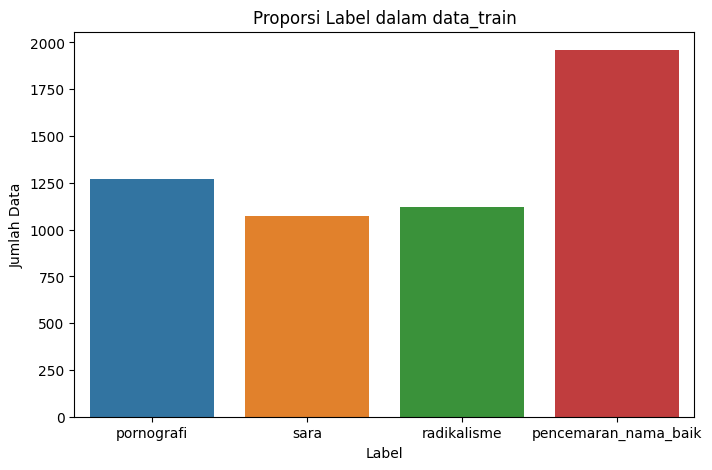

In [41]:
# Menghitung jumlah masing-masing label
label_counts = data_train.iloc[:, 1:5].sum()

# Membuat barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Proporsi Label dalam data_train')
plt.show()

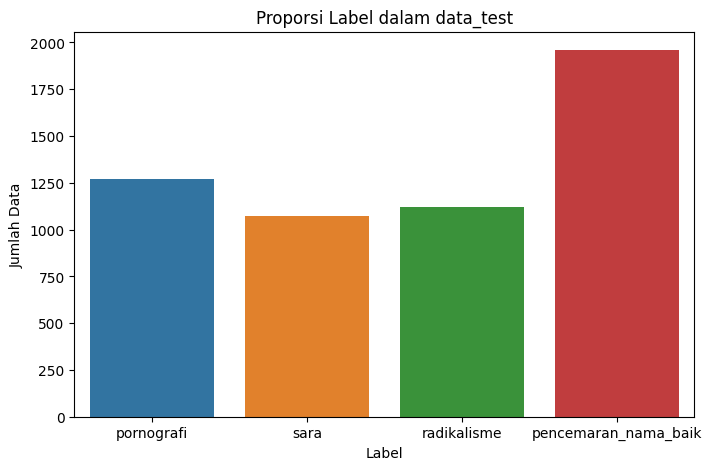

In [42]:
# Menghitung jumlah masing-masing label
label_counts = data_train.iloc[:, 1:5].sum()

# Membuat barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Proporsi Label dalam data_test')
plt.show()

Distribusi label antara `data_train` dan `data_test` cukup mirip dan proporsi jumlah setiap label juga tidak berbeda signifikan.

Selain melihat proporsi kelas, kita juga bisa melihat distribusi dari jumlah karakter setiap komentar yang akan diolah.

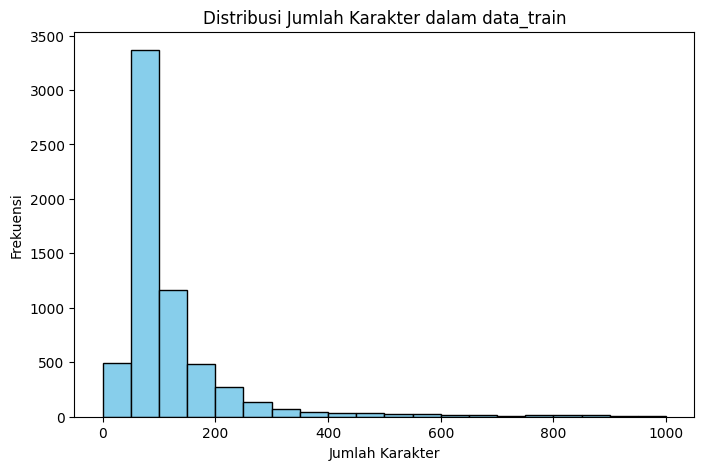

In [43]:
# Hitung jumlah karakter dalam setiap teks
jumlah_karakter = data_train['processed_text'].apply(len)

# Membuat histogram distribusi jumlah karakter
plt.figure(figsize=(8, 5))
plt.hist(jumlah_karakter, bins=20, color='skyblue', edgecolor='black', range=(0, 1000))
plt.xlabel('Jumlah Karakter')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jumlah Karakter dalam data_train')
plt.show()

Jika dilihat dari histogram diatas, mayoritas karakter pada setiap komentar sekitar 0-1500 karakter.

Selanjutnya, kita juga bisa melihat mayoritas jumlah kata pada setiap kalimat yang ada pada sebuah sebuah komentar.

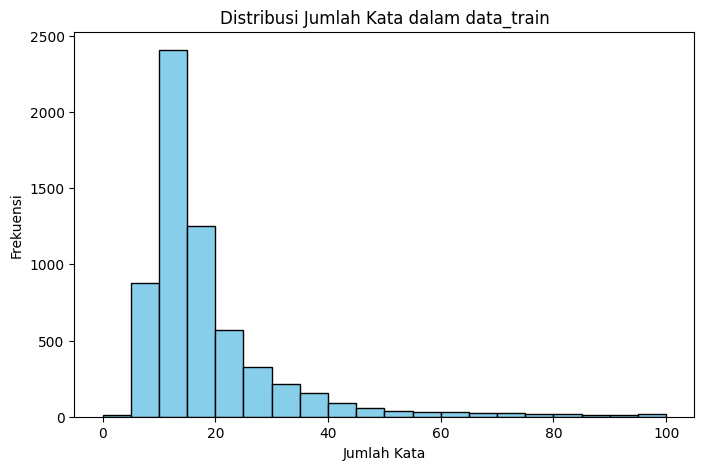

In [44]:
# Hitung jumlah kata dalam setiap teks
jumlah_kata = data_train['processed_text'].apply(lambda x: len(x.split()))

# Membuat histogram distribusi jumlah kata
plt.figure(figsize=(8, 5))
plt.hist(jumlah_kata, bins=20, color='skyblue', edgecolor='black', range=(0, 100))
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jumlah Kata dalam data_train')
plt.show()

Plot diatas menunjukkan mayoritas jumlah kata pada setiap kalimat berkisar antara  0 sampai dengan 100 kata.

Kemudian, mari kita lihat proporsi sumber dari komentar.

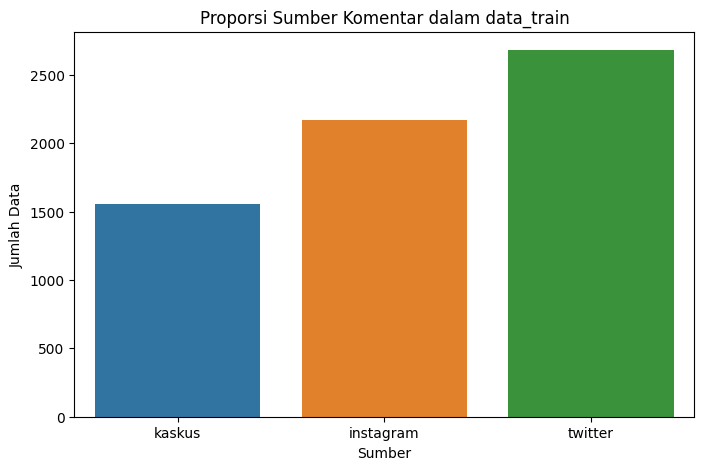

In [45]:
# Membuat countplot
plt.figure(figsize=(8, 5))
sns.countplot(x ='source', data = data_train)
plt.xlabel('Sumber')
plt.ylabel('Jumlah Data')
plt.title('Proporsi Sumber Komentar dalam data_train')
plt.show()

Selanjutnya, mari kita lihat kata-kata yang paling sering muncul pada setiap label dengan menggunakan `wordcloud`.

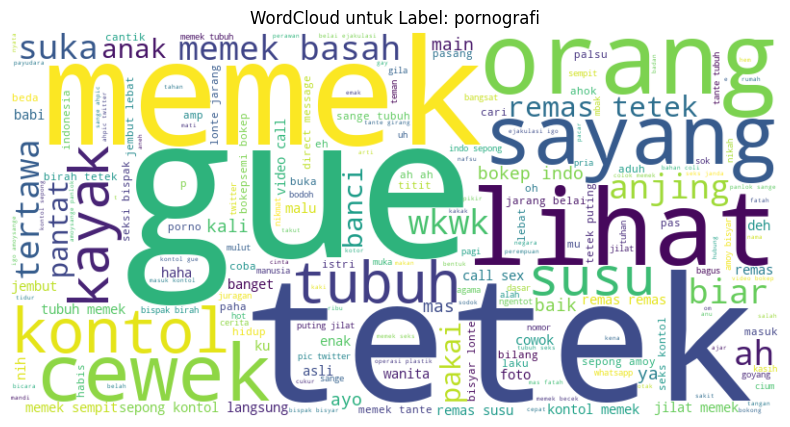

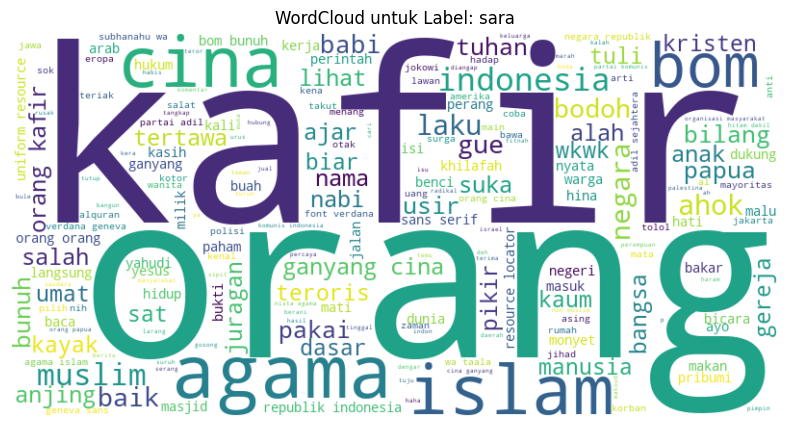

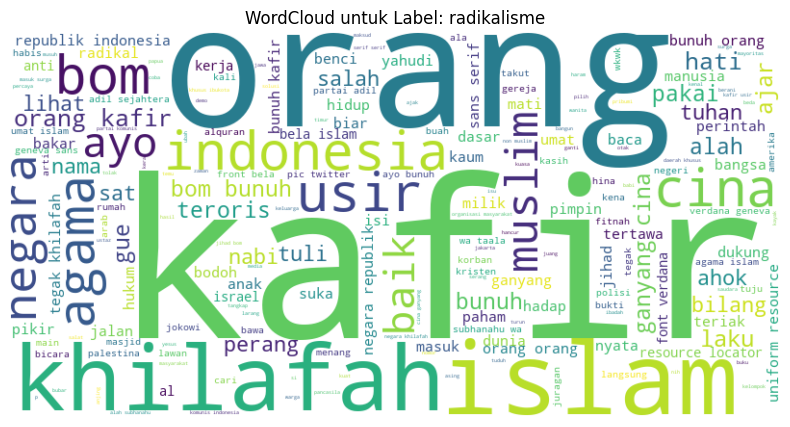

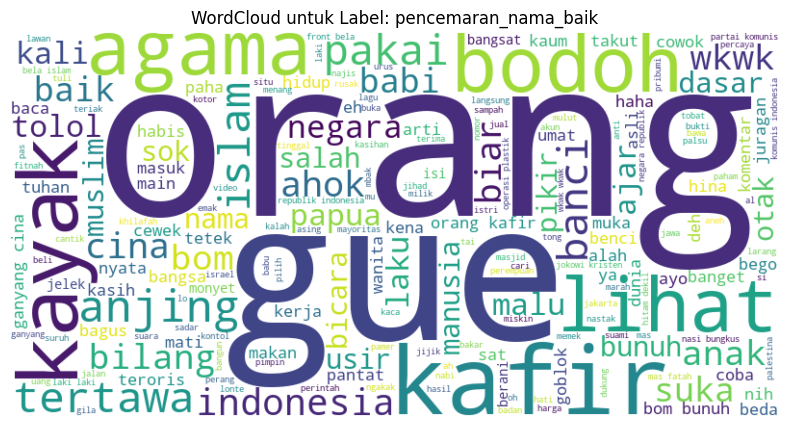

In [46]:
# List label
labels = ['pornografi', 'sara', 'radikalisme', 'pencemaran_nama_baik']

# Membuat WordCloud untuk setiap label
for label in labels:
    # Filter teks yang sesuai dengan label
    label_text = " ".join(data_train[data_train[label] == 1]['processed_text'])

    # Membuat WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(label_text)

    # Menampilkan WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud untuk Label: {label}')
    plt.axis('off')
    plt.show()

## Modelling

In [3]:
data_train = pd.read_csv('https://raw.githubusercontent.com/syahvan/indo-toxic-comment-classification/main/data/train_processed.csv')
data_test = pd.read_csv('https://raw.githubusercontent.com/syahvan/indo-toxic-comment-classification/main/data/test_processed.csv')

In [4]:
tf_idf = TfidfVectorizer()

# Train
X_train = tf_idf.fit_transform(data_train['processed_text'].values.astype('U'))
y_train = data_train[['pornografi', 'sara', 'radikalisme', 'pencemaran_nama_baik']]

# Test
X_test = tf_idf.transform(data_test['processed_text'].values.astype('U'))
y_test = data_test[['pornografi', 'sara', 'radikalisme', 'pencemaran_nama_baik']]

pickle.dump(tf_idf, open("C:/Users/HPDownloads/Uni/Algoritma Scholarship/Data Career Day/indo-toxic-comment-classification/tf_idf.pkt", "wb"))

### Naive Bayes

In [5]:
# Buat pipeline dengan preprocessing dan model
model_nb = MultiOutputClassifier(MultinomialNB())

# Latih model menggunakan data training
model_nb.fit(X_train, y_train)

# Prediksi menggunakan data test
y_pred_nb = model_nb.predict(X_test)

# Simpan model ke file
pickle.dump(model_nb, open("C:/Users/HPDownloads/Uni/Algoritma Scholarship/Data Career Day/indo-toxic-comment-classification/model naive bayes.pkt", "wb"))

# Evaluasi model
print('Akurasi Model: ', accuracy_score(y_test, y_pred_nb))
print('F1 Score: ', f1_score(y_test, y_pred_nb, average="micro"))
print('Hamming Loss: ', hamming_loss(y_test, y_pred_nb))

Akurasi Model:  0.5778961384820239
F1 Score:  0.3216216216216216
Hamming Loss:  0.16711051930758988


In [6]:
labels = ["pornografi", "sara", "radikalisme", "pencemaran nama baik"]

for i, label in enumerate(labels):
    print(f"\nClassification Report untuk Label '{label}':")
    report = classification_report(y_test.iloc[:,i], y_pred_nb[:, i])
    print(report)


Classification Report untuk Label 'pornografi':
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       599
           1       1.00      0.55      0.71       152

    accuracy                           0.91       751
   macro avg       0.95      0.77      0.83       751
weighted avg       0.92      0.91      0.90       751


Classification Report untuk Label 'sara':
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       637
           1       1.00      0.05      0.10       114

    accuracy                           0.86       751
   macro avg       0.93      0.53      0.51       751
weighted avg       0.88      0.86      0.80       751


Classification Report untuk Label 'radikalisme':
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       629
           1       1.00      0.07      0.12       122

    accuracy                           0

### Random Forest

In [56]:
# Buat pipeline dengan preprocessing dan model
model_rf = MultiOutputClassifier(RandomForestClassifier(random_state=42))

# Latih model menggunakan data training
model_rf.fit(X_train, y_train)

# Prediksi menggunakan data test
y_pred_rf = model_rf.predict(X_test)

# Simpan model ke file
pickle.dump(model_rf, open("C:/Users/HPDownloads/Uni/Algoritma Scholarship/Data Career Day/indo-toxic-comment-classification/model random forest.pkt", "wb"))

# Evaluasi model
print('Akurasi Model: ', accuracy_score(y_test, y_pred_rf))
print('F1 Score: ', f1_score(y_test, y_pred_rf, average="micro"))
print('Hamming Loss: ', hamming_loss(y_test, y_pred_rf))

Akurasi Model:  0.7350199733688415
F1 Score:  0.7654320987654322
Hamming Loss:  0.08854860186418109


In [57]:
for i, label in enumerate(labels):
    print(f"\nClassification Report untuk Label '{label}':")
    report = classification_report(y_test.iloc[:,i], y_pred_rf[:, i])
    print(report)


Classification Report untuk Label 'pornografi':
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       599
           1       0.98      0.85      0.91       152

    accuracy                           0.97       751
   macro avg       0.97      0.92      0.94       751
weighted avg       0.97      0.97      0.96       751


Classification Report untuk Label 'sara':
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       637
           1       0.83      0.57      0.68       114

    accuracy                           0.92       751
   macro avg       0.88      0.77      0.81       751
weighted avg       0.91      0.92      0.91       751


Classification Report untuk Label 'radikalisme':
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       629
           1       0.78      0.82      0.80       122

    accuracy                           0

### XGBoost

In [7]:
# Buat pipeline dengan preprocessing dan model
model_xgb = MultiOutputClassifier(XGBClassifier(random_state=42))

# Latih model menggunakan data training
model_xgb.fit(X_train, y_train, eval_metric='logloss')

# Prediksi menggunakan data test
y_pred_xgb = model_xgb.predict(X_test)

# Simpan model ke file
pickle.dump(model_xgb, open("C:/Users/HPDownloads/Uni/Algoritma Scholarship/Data Career Day/indo-toxic-comment-classification/model xgboost.pkt", "wb"))

# Evaluasi model
print('Akurasi Model: ', accuracy_score(y_test, y_pred_xgb))
print('F1 Score: ', f1_score(y_test, y_pred_xgb, average="micro"))
print('Hamming Loss: ', hamming_loss(y_test, y_pred_xgb))

Akurasi Model:  0.7177097203728362
F1 Score:  0.7616624257845633
Hamming Loss:  0.09354194407456724


In [8]:
for i, label in enumerate(labels):
    print(f"\nClassification Report untuk Label '{label}':")
    report = classification_report(y_test.iloc[:,i], y_pred_xgb[:, i])
    print(report)


Classification Report untuk Label 'pornografi':
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       599
           1       0.94      0.88      0.90       152

    accuracy                           0.96       751
   macro avg       0.95      0.93      0.94       751
weighted avg       0.96      0.96      0.96       751


Classification Report untuk Label 'sara':
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       637
           1       0.69      0.59      0.64       114

    accuracy                           0.90       751
   macro avg       0.81      0.77      0.79       751
weighted avg       0.89      0.90      0.89       751


Classification Report untuk Label 'radikalisme':
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       629
           1       0.80      0.84      0.82       122

    accuracy                           0

## Testing

In [41]:
# Memuat model dari file
loaded_model = pickle.load(open("C:/Users/HPDownloads/Uni/Algoritma Scholarship/Data Career Day/indo-toxic-comment-classification/model_rf.pkt", "rb"))

In [43]:
# Kalimat uji
test_sentence = input('Masukkan Kalimat: ')
test_sentence = tf_idf.transform([preprocess_text(test_sentence)])

# Melakukan prediksi dengan kalimat uji
predicted_labels = loaded_model.predict(test_sentence)

# Membuat kalimat output
output_sentence = "Kalimat tersebut toxic karena mengandung "

# Membuat list untuk label yang diprediksi positif
predicted_positive_labels = [labels[i] for i in range(len(labels)) if predicted_labels[0][i] == 1]

# Format output sesuai dengan label yang diprediksi
if predicted_positive_labels:
    if len(predicted_positive_labels) == 1:
        output_sentence += predicted_positive_labels[0]
    else:
        output_sentence += ", ".join(predicted_positive_labels[:-1])
        output_sentence += " dan " + predicted_positive_labels[-1]
else:
    output_sentence = "Kalimat tersebut tidak toxic"

# Mengambil probabilitas dari model
probabilities = rf_pipeline.predict_proba(test_sentence)
proba_list = []
for proba in probabilities:
    value = proba[0][1]*100
    proba_list.append(value)

# Membuat dataframe untuk plot
prob_df = pd.DataFrame({'Label': labels, 'Probabilitas': proba_list})

# Membuat plot bar untuk probabilitas
fig = px.bar(prob_df, x='Label', y='Probabilitas', title=output_sentence, width=1000, height=400, color='Label')
fig.update_layout(
    font_family="Montserrat",
    font_color="black",
    font_size=12,
    title_font_size=14,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    legend_title_font_size=12)
fig.update_yaxes(range=[0, 100])
hovertemp = "<b>Label: </b> %{x} <br>"
hovertemp += "<b>Probabilitas: </b> %{y}<extra></extra>%"
fig.update_traces(hovertemplate=hovertemp)

# Menampilkan plot
fig.show()

## Referensi

- [Digital 2023: Indonesia](https://datareportal.com/reports/digital-2023-indonesia)
- [Github: Indonesian Social Media Post Toxicity Dataset](https://github.com/ahmadizzan/netifier)
- [Indeks Keberadaban Digital: Indonesia Terburuk se-Asia Tenggara](https://www.voaindonesia.com/a/indeks-keberadaban-digital-indonesia-terburuk-se-asia-tenggara/5794123.html)